# __Projet 10 :__

Scénario
Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).
 

 
Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.

Lexique :

Ce dataframe va contenir les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

- length : la longueur du billet (en mm) ;
- height_left : la hauteur du billet *(mesurée sur le côté gauche, en mm)** ;
- height_right : La hauteur du billet (mesurée sur le côté droit, en mm) ;
- margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
- margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
- diagonal : la diagonale du billet (en mm) ;
- is_genuine : Indication si le billet est vrai (True) ou faux (False).

# <u>Mise en place du DF :<u>

### Importation des librairies + Visu du CSV Billet :

#### Import des librairies :

In [74]:
# Import des Librairies :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

#from plotnine import * # pour ggplot 

#from yellowbrick.features import Rank2D # librairie pour heatmap

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import scipy as st
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from scipy.stats import ks_2samp

from sklearn import metrics

#### Import du CSV Billet :

In [75]:
# Import du CSV : 

DF_billet = pd.read_csv('billets.csv',sep=';')
DF_billet.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

#### Visu du CSV Billet :

In [76]:
DF_billet.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [77]:
DF_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On détecte 37 Nan dans la colonne Margin_low il va falloir vérifier.

Boucle de détection des NaN pour contrôle :

In [78]:
# Detection de tout les NaN
column_with_nan = DF_billet.columns[DF_billet.isnull().any()]
DF_billet.shape
# boucle 
for column in column_with_nan:
    print(column, DF_billet[column].isnull().sum())

margin_low 37


#### Visu des NaN dans le CSV Billet (Erreur_NaN) :

Detection des NaN via isna (  ) :

In [79]:
Erreur_NaN = DF_billet[DF_billet['margin_low'].isna()]
Erreur_NaN.head(37)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

#### Création d'un DF sans NaN :

In [80]:
DF_billet_NaN = DF_billet.dropna()
DF_billet_NaN

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

# Regression Linéaire :

In [81]:
# création df pour la librairie
LR = LinearRegression()
# Modification des DF pour les NaN
Erreur_NaN = DF_billet[DF_billet['margin_low'].isnull() == True]
DF_billet_NaN = DF_billet[DF_billet['margin_low'].isnull() == False]
# Création du modéle X,y sur margin_low
y = DF_billet_NaN['margin_low']
X = DF_billet_NaN.drop('margin_low', axis = 1)
# affinage des résultat
LR.fit(X, y)
# drop des margin_low
Erreur_NaN.drop('margin_low', axis = 1, inplace = True)
# utilisation de la pred pour les erreur NaN
pred = LR.predict(Erreur_NaN)
# validation de l'imputation reg lineaire pour margin_low
Erreur_NaN['margin_low'] = pred

In [9]:
DF_billet = pd.concat([Erreur_NaN, DF_billet_NaN] ,axis = 0)
DF_billet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
 6   margin_low    1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [10]:
DF_billet['is_genuine'] = DF_billet['is_genuine'].apply(lambda x: 0 if x == True else 1)
DF_billet["is_genuine"] = DF_billet["is_genuine"].astype('category')
DF_billet

is_genuine  diagonal  height_left  height_right  margin_up  length  \
72            0    171.94       103.89        103.45       3.25  112.79   
99            0    171.93       104.07        104.18       3.14  113.08   
151           0    172.07       103.80        104.38       3.02  112.93   
197           0    171.45       103.66        103.80       3.62  113.27   
241           0    171.83       104.14        104.06       3.02  112.36   
...         ...       ...          ...           ...        ...     ...   
1495          1    171.75       104.38        104.17       3.09  111.28   
1496          1    172.19       104.63        104.44       3.37  110.97   
1497          1    171.80       104.01        104.12       3.36  111.95   
1498          1    172.06       104.28        104.06       3.46  112.25   
1499          1    171.47       104.15        103.82       3.37  112.07   

      margin_low  
72      4.064954  
99      4.111990  
151     4.134003  
197     3.993571  
241     4.140399  
...          ...  
1495    4.420000  
1496    5.270000  
1497    5.510000  
1498    5.170000  
1499    4.630000  

[1500 rows x 7 columns]

In [11]:
# Corresponds au R-Squared :
LR.score(X, y)

0.6168760755671029

Expliquation du résultat :

In [12]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=DF_billet).fit()
reg_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     409.3
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          5.35e-311
Time:                        22:13:32   Log-Likelihood:                -774.98
No. Observations:                1500   AIC:                             1564.
Df Residuals:                    1493   BIC:                             1601.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7262      8.124      0.212      0.832     -14.210      17.663
is_genuine[T.1]     1.1406      0.048     23.714      0.000       1.046       1.235
diagonal           -0.0130      0.035     -0.373      0.709      -0.081       0.055
height_left         0.0283      0.038      0.742      0.458      -0.046       0.103
height_right        0.0267      0.037      0.723      0.470      -0.046       0.099
margin_up          -0.2128      0.057     -3.733      0.000      -0.325      -0.101
length             -0.0039      0.023     -0.170      0.865      -0.049       0.041
==============================================================================
Omnibus:                       26.428   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.871
Skew:                           0.061   Prob(JB):                     2.44e-11
Kurtosis:                       3.876   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On supprime length qui est la moins significative.

### Retirez les variables non significatives

In [13]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=DF_billet).fit()
reg_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     491.4
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          2.33e-312
Time:                        22:13:32   Log-Likelihood:                -775.00
No. Observations:                1500   AIC:                             1562.
Df Residuals:                    1494   BIC:                             1594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2741      7.675      0.166      0.868     -13.782      16.330
is_genuine[T.1]     1.1467      0.032     36.027      0.000       1.084       1.209
diagonal           -0.0128      0.035     -0.368      0.713      -0.081       0.056
height_left         0.0283      0.038      0.742      0.458      -0.046       0.103
height_right        0.0266      0.037      0.719      0.472      -0.046       0.099
margin_up          -0.2127      0.057     -3.732      0.000      -0.325      -0.101
==============================================================================
Omnibus:                       26.505   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.102
Skew:                           0.061   Prob(JB):                     2.18e-11
Kurtosis:                       3.878   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Maintenant on supprime diagonal qui est la moins significative.

In [14]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=DF_billet).fit()
reg_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     614.6
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          9.45e-314
Time:                        22:13:32   Log-Likelihood:                -775.07
No. Observations:                1500   AIC:                             1560.
Df Residuals:                    1495   BIC:                             1587.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7692      5.304     -0.145      0.885     -11.173       9.635
is_genuine[T.1]     1.1484      0.031     36.484      0.000       1.087       1.210
height_left         0.0272      0.038      0.717      0.473      -0.047       0.102
height_right        0.0261      0.037      0.705      0.481      -0.046       0.099
margin_up          -0.2133      0.057     -3.746      0.000      -0.325      -0.102
==============================================================================
Omnibus:                       26.765   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.868
Skew:                           0.059   Prob(JB):                     1.48e-11
Kurtosis:                       3.885   Cond. No.                     7.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Maintenant on supprime height_right et height_left qui sont les moins significatifs.

In [15]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=DF_billet).fit()
reg_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1229.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          1.32e-316
Time:                        22:13:32   Log-Likelihood:                -775.61
No. Observations:                1500   AIC:                             1557.
Df Residuals:                    1497   BIC:                             1573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.7622      0.174     27.341      0.000       4.421       5.104
is_genuine[T.1]     1.1633      0.028     41.578      0.000       1.108       1.218
margin_up          -0.2117      0.057     -3.719      0.000      -0.323      -0.100
==============================================================================
Omnibus:                       26.833   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.158
Skew:                           0.057   Prob(JB):                     1.28e-11
Kurtosis:                       3.889   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au 𝑅2, il vaut environ 0.62, tout comme le 𝑅2 ajusté.

### Colinéarité des variables :

In [16]:
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5811624794799994, 1.5811624794799992]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### l'hypothèse d’homoscédasticité :

#### Test de Breusch Pagan :

In [18]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.713663891895336e-37


La p-valeur ici est inférieure à $5$%, on rejette l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

#### Test de Godfelt et Quandt :

In [19]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(reg_multi.resid, reg_multi.model.exog)
lzip(name, test)

[('F statistic', 2.483003246648481), ('p-value', 1.2195839299761894e-34)]

La p-valeur ici est inférieure à $5$%, on rejette l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).



### hypothèse de normalité :

#### Test de Shapiro :

In [20]:
Shapiro = shapiro(reg_multi.resid)
Shapiro

ShapiroResult(statistic=0.9921531677246094, pvalue=3.630457285908051e-07)

Ici, l'hypothèse de normalité est remise en cause (p-value = 7.04e-06 < 0.05).

In [21]:
shapiro_1 = DF_billet[['is_genuine', 'margin_low']]           
n,random_state = 1500,1
st.stats.shapiro(list(shapiro_1.sample(n,random_state=random_state).is_genuine))

ShapiroResult(statistic=0.5948871970176697, pvalue=0.0)

<AxesSubplot:>

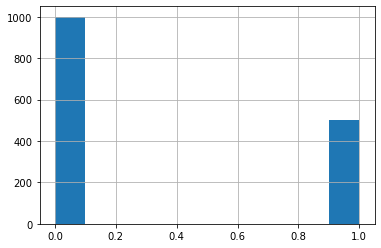

In [22]:
shapiro_1.sample(n,random_state=random_state).is_genuine.hist()

Normalement distribué

In [23]:
shapiro_2 = DF_billet[['is_genuine', 'margin_up']]           
n,random_state = 1500,1
st.stats.shapiro(list(shapiro_2.sample(n,random_state=random_state).is_genuine))

ShapiroResult(statistic=0.5948871970176697, pvalue=0.0)

<AxesSubplot:>

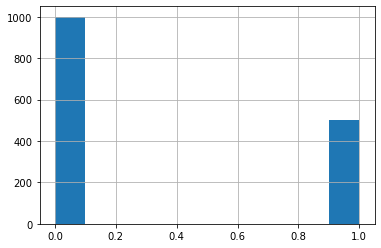

In [24]:
shapiro_2.sample(n,random_state=random_state).is_genuine.hist()

Normalement distribué

In [25]:
shapiro_3 = DF_billet[['margin_low', 'margin_up']]           
n,random_state = 1500,1
st.stats.shapiro(list(shapiro_3.sample(n,random_state=random_state).margin_low))

ShapiroResult(statistic=0.93565833568573, pvalue=5.9671849827058915e-25)

<AxesSubplot:>

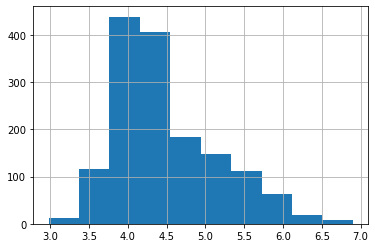

In [26]:
shapiro_3.sample(n,random_state=random_state).margin_low.hist()

Loi log normal

## Graphique :

### Boite à moustache de DF_billet :

#### margin_low / is_genuine :

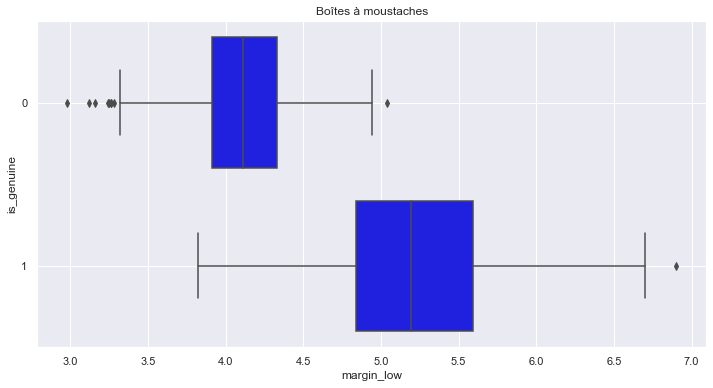

In [27]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="margin_low", y="is_genuine", data=DF_billet, color='blue')
plt.xlabel('margin_low')
plt.ylabel('is_genuine')
plt.title('Boîtes à moustaches')
plt.grid(True)
plt.show()

#### margin_up / is_genuine :

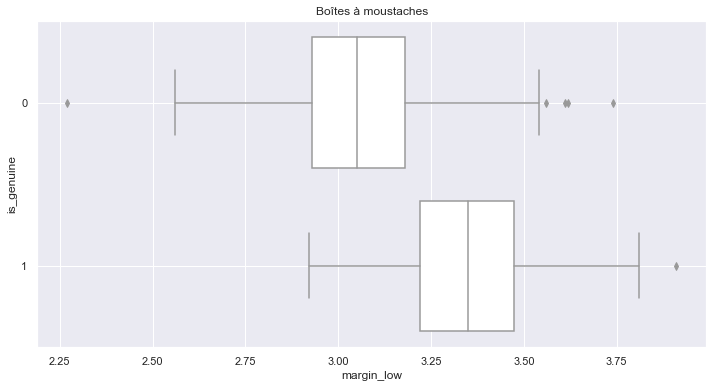

In [28]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="margin_up", y="is_genuine", data=DF_billet, color='white')
plt.xlabel('margin_low')
plt.ylabel('is_genuine')
plt.title('Boîtes à moustaches')
plt.grid(True)
plt.show()

#### length / is_genuine :

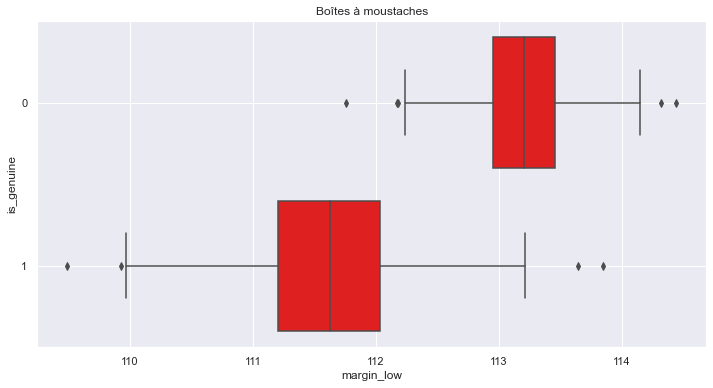

In [29]:
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="length", y="is_genuine", data=DF_billet, color='red')
plt.xlabel('margin_low')
plt.ylabel('is_genuine')
plt.title('Boîtes à moustaches')
plt.grid(True)
plt.show()

0 = False , 1 = True 

### Pairplot de DF_billet :

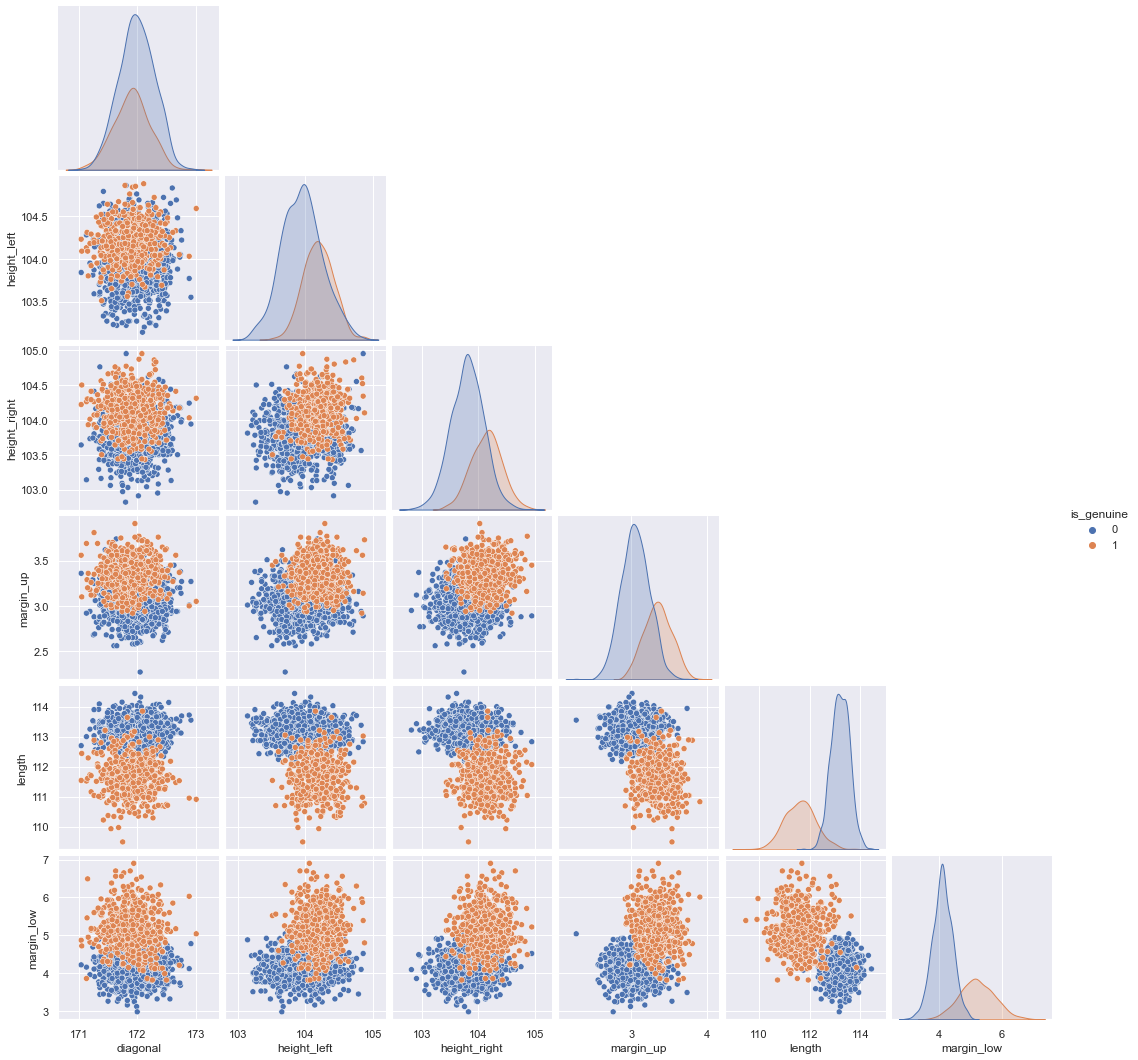

In [30]:
sns.pairplot(DF_billet , hue='is_genuine', corner=True)
plt.show()

- Les vrais ont tendance à être plus long que les faux (margin_low - Length)
- Les faux ont tendance à avoir une marge plus grande (margin_up)

# <u>ACP<u>  :

### Import des librairies :

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler # classe pour standardisation
from sklearn import preprocessing
from sklearn import decomposition

## Standardisation et transformation de DF_Analyse en Z_scaled :

In [32]:
billet_values = DF_billet.drop(columns= ['is_genuine'])
Z = billet_values.values
std_scale = preprocessing.StandardScaler().fit(Z)
Z_scaled = std_scale.transform(Z)
#moyenne
print(np.mean(Z_scaled,axis=0))
#écart-type
print(np.std(Z_scaled,axis=0,ddof=0))
# Visu
Z_scaled

[ 1.46466543e-14  4.81463758e-14 -2.78343274e-14 -1.02318154e-15
  4.16851738e-16 -1.51582450e-16]
[1. 1. 1. 1. 1. 1.]


array([[-0.06044051, -0.46610259, -1.44479235,  0.42516803,  0.12780265,
        -0.63347565],
       [-0.09321736,  0.13517643,  0.79778359, -0.0495104 ,  0.46020417,
        -0.56217335],
       [ 0.36565855, -0.76674211,  1.41218796, -0.56734141,  0.28827235,
        -0.52880408],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  0.89984645, -0.83501554,
         1.55705277],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.33137229, -0.4911519 ,
         1.04165087],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.94299904, -0.69747008,
         0.22307137]])

#### Décomposition pour Z_scaled  :

In [33]:
PCA_decomposition = decomposition.PCA(n_components = 2)
PCA_decomposition.fit(Z_scaled)
PCA_decomposition

PCA(n_components=2)

#### Visualisation de la variance pour Z_scaled :

In [34]:
print(PCA_decomposition.explained_variance_ratio_)
print(PCA_decomposition.explained_variance_ratio_.sum())

[0.43211292 0.16957177]
0.6016846925326268


In [35]:
Billet_v1 = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(2)], 
        "Valeur propre" : PCA_decomposition.explained_variance_,
        "% variance expliquée" : np.round(PCA_decomposition.explained_variance_ratio_ * 100),
        "% cumsum variance expliquée" : np.round(np.cumsum(PCA_decomposition.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cumsum variance expliquée"]
)
Billet_v1

Dimension  Valeur propre  % variance expliquée  % cumsum variance expliquée
0      Dim1       2.594407                  43.0                         43.0
1      Dim2       1.018109                  17.0                         60.0

#### Graphique visualisation des dimensions :

Text(0.5, 0.98, 'Variance expliquée par dimension')

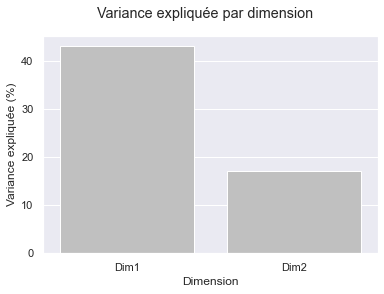

In [36]:
Billet_graph = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["Silver"],
                data = Billet_v1)
Billet_graph.set(ylabel = "Variance expliquée (%)")
Billet_graph.figure.suptitle("Variance expliquée par dimension")

## __Z_Projected :__

### Mise en place des données pour Z_Projected :

In [37]:
Z_projected = PCA_decomposition.transform(Z_scaled)

### DF Z_projected :

#### Visu de Z_projected (DF)

In [38]:
pd.DataFrame(Z_projected)

0         1
0    -0.919912 -0.306218
1    -0.182466  0.104097
2    -0.398150  0.317110
3    -0.258472 -1.909692
4     0.007357 -0.213655
...        ...       ...
1495  1.428771 -0.270065
1496  3.280741  1.317273
1497  1.888689 -0.600759
1498  1.789637  0.511059
1499  1.043018 -1.471220

[1500 rows x 2 columns]

## Visu des 2 composantes :

#### Scatter plot de Z_Projected :

Représentation de la composante 1 et 2 :

In [39]:
fig =  px.scatter( x= Z_projected[:,0], y = Z_projected[:,1],color = DF_billet.is_genuine)
fig.update_layout(width=800, height=800, title = 'Composante 1 et 2',
                  xaxis=dict(title='1ere composante à 49%'),
                  yaxis=dict(title='2eme composante à 15%')
                           )

#### Cercle de corrélation  de Z_Projected :

In [40]:
DF_billet

is_genuine  diagonal  height_left  height_right  margin_up  length  \
72            0    171.94       103.89        103.45       3.25  112.79   
99            0    171.93       104.07        104.18       3.14  113.08   
151           0    172.07       103.80        104.38       3.02  112.93   
197           0    171.45       103.66        103.80       3.62  113.27   
241           0    171.83       104.14        104.06       3.02  112.36   
...         ...       ...          ...           ...        ...     ...   
1495          1    171.75       104.38        104.17       3.09  111.28   
1496          1    172.19       104.63        104.44       3.37  110.97   
1497          1    171.80       104.01        104.12       3.36  111.95   
1498          1    172.06       104.28        104.06       3.46  112.25   
1499          1    171.47       104.15        103.82       3.37  112.07   

      margin_low  
72      4.064954  
99      4.111990  
151     4.134003  
197     3.993571  
241     4.140399  
...          ...  
1495    4.420000  
1496    5.270000  
1497    5.510000  
1498    5.170000  
1499    4.630000  

[1500 rows x 7 columns]

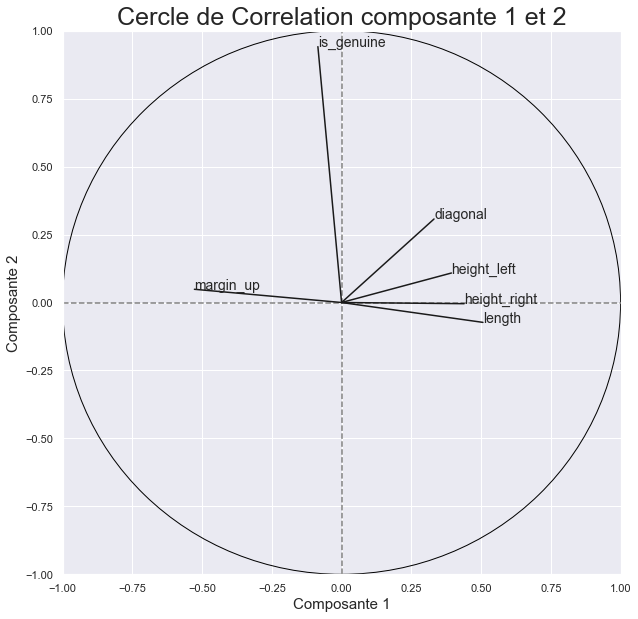

In [41]:
# Visu du cercle de corrélation % variance expliquée et de la Valeur propre :
Pca_test = PCA_decomposition.components_

fig,ax = plt.subplots(figsize=(10,10))

# Afficher une ligne horizontale x = 0
plt.plot([-1, 1], [0, 0], color = 'grey', ls='--')

# Afficher une ligne verticale y = 0
plt.plot([0, 0], [-1, 1], color = 'grey', ls='--')

# Affichage d un cercle 
cercle = plt.Circle((0,0),1, color='black', fill=False)

ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Variable de l ACP
for n, (z, w) in enumerate(zip(Pca_test[0, :],Pca_test[1, :])) :
    
    # Afficher un segment de l origine au point (x, y)
    plt.plot([0, z], [0, w], color='k')
    # Afficher le nom de la perf
    plt.text(z, w, DF_billet.columns[n], fontsize='14')




    
plt.xlabel('Composante 1', fontsize = 15)
plt.ylabel('Composante 2', fontsize = 15)
plt.title(' Cercle de Correlation composante 1 et 2 ', fontsize = 25)
plt.grid(True)
plt.show()

## Split des données

In [42]:
x = Z_projected
y = DF_billet['is_genuine']

Faire tester le modéle sur 20% :

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8 ,random_state = 1 )

# KMEANS :

### __Affichage des clusters__ :

### Préparation des données

In [44]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(xtrain, ytrain)
modele = model.predict(xtest)
modele = pd.DataFrame(modele, index=ytest.index, columns=['cluster'])
modele

cluster
54          0
38          0
1259        1
300         0
1346        1
...       ...
1087        1
1199        1
1124        1
505         0
379         0

[300 rows x 1 columns]

In [45]:
z_test = pd.DataFrame(ytest)
cluster = pd.DataFrame(xtest, index=z_test.index, columns=['composante1', 'composante2'])
billetTest = pd.concat([modele, cluster], axis=1)
billetCluster = pd.concat([billetTest, z_test], axis = 1)
billetCluster

cluster  composante1  composante2 is_genuine
54          0    -0.316286    -0.273797          0
38          0     0.332615    -0.027904          0
1259        1     2.476291     1.083221          1
300         0     0.162943    -1.005807          0
1346        1     2.360466     0.220387          1
...       ...          ...          ...        ...
1087        1     1.124824    -0.002022          1
1199        1     3.619131     0.731677          1
1124        1     3.005135    -0.580376          1
505         0    -1.101786     0.237054          0
379         0    -1.224527     0.241308          0

[300 rows x 4 columns]

### Importation des librairies :

In [46]:
# Pour l apprentissage non supervise :
from sklearn.cluster import KMeans # Pour la creation de clustering 
from sklearn import cluster # k-means sur les données centrées et réduites

## Visu des centroids :

In [82]:
# Appliquer la classification K-Means :

kmeans = KMeans(n_clusters = 2).fit(xtrain, ytrain)

y_kmeans = kmeans.predict(xtest)

y_kmeans = pd.DataFrame(y_kmeans, columns = ['Cluster'])

In [48]:
Centroids = kmeans.cluster_centers_
Centroids

array([[ 2.01981193, -0.06370499],
       [-1.06668707,  0.02373959]])

In [49]:
Centroids = pd.DataFrame(Centroids,columns=['Centroids_X','Centroids_Y'])
Centroids

Centroids_X  Centroids_Y
0     2.019812    -0.063705
1    -1.066687     0.023740

In [50]:
import plotly.offline as pyoff

billetCluster.head()
scatter = dict(
    mode = "markers",
    name = "clusters",
    type = "scatter",
    x = billetCluster['composante1'], y = billetCluster['composante2'],
    marker = dict( size=5, color=billetCluster.cluster )
)   
point = dict(  
    mode = "markers",
    name = "point",
    type = "scatter",
    x = billetCluster['composante1'], y = billetCluster['composante2'],
    marker = dict( size=20, color= billetCluster.is_genuine, symbol = 'circle-open' )
    
)
clusters = dict(
    mode = 'markers',
    name = "centroides",
    type = "scatter",
    x = Centroids['Centroids_X'], y = Centroids['Centroids_Y'],
    marker = dict(size=15, color = 'rgb(228,26,28)', symbol='cross')
)
layout = dict(
    title = 'clusters avec centroides',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters, point], layout=layout )
# Use py.iplot() for IPython notebook
pyoff.iplot(fig, filename='clusters avec centroides')

## Matrice de Confusion :

In [51]:
from sklearn.metrics import confusion_matrix

Même jeux sur les 3 :

<AxesSubplot:>

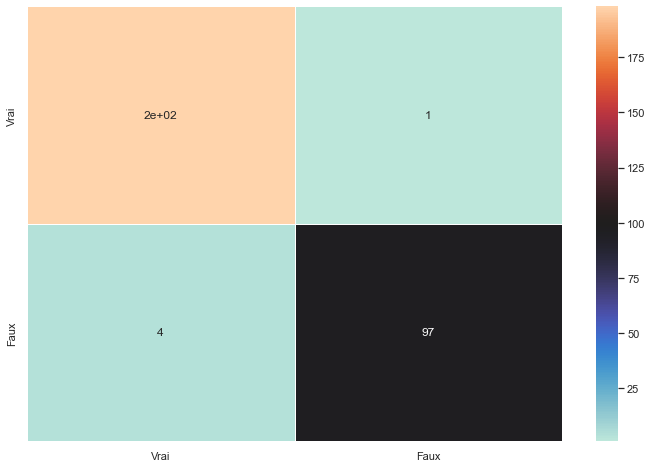

In [52]:
fig = plt.figure(figsize=(12,8))
cf_matrix = confusion_matrix(billetCluster.cluster, billetCluster.is_genuine)
sns.heatmap(cf_matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"],cmap='icefire', linewidths = 1)

# <u>KNN (plus proche voisins) :<u>

### Import des librairies 

In [53]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [54]:
model_2 = KNeighborsClassifier()
model_2.fit(xtrain, ytrain)
model_2.score(xtrain, ytrain)


print('Test Score :',model_2.score(xtest, ytest))
print('Train Score :',model_2.score(xtrain, ytrain))

Test Score : 0.9766666666666667
Train Score : 0.9858333333333333


In [55]:
model_2.predict(xtest)
print(model_2.predict(xtest))

[0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1
 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 1 0 0]


In [56]:
error = 1 - model_2.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.023333


3-5 = moins d'erreur.

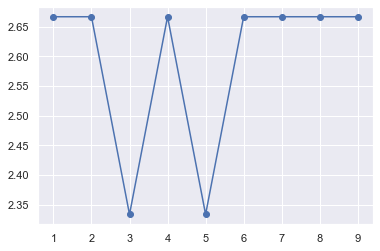

In [57]:
errors = []
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(1,10), errors, 'o-')
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix

Matrice de confusion :

<AxesSubplot:>

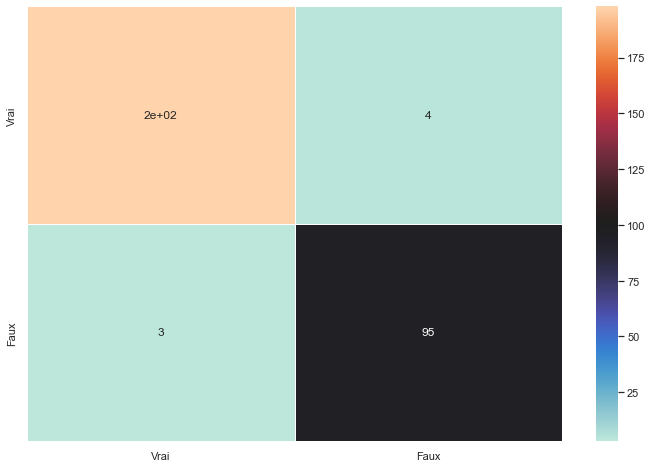

In [59]:
fig = plt.figure(figsize=(12,8))
cf_matrix = confusion_matrix(ytest, model_2.predict(xtest))
sns.heatmap(cf_matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"], linewidths = .5, cmap='icefire')

# <u>Regression Logistique<u> :

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logisticRegr = LogisticRegression()

In [62]:
logisticRegr.fit(xtrain, ytrain)

LogisticRegression()

In [63]:
predictions = logisticRegr.predict(xtest)

In [64]:
predictions

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [65]:
# Use score method to get accuracy of model
score = logisticRegr.score(xtest, ytest)
print((score)*100,'%')

98.0 %


In [66]:
cm = metrics.confusion_matrix(ytest, predictions)
print(cm)

[[198   4]
 [  2  96]]


<AxesSubplot:>

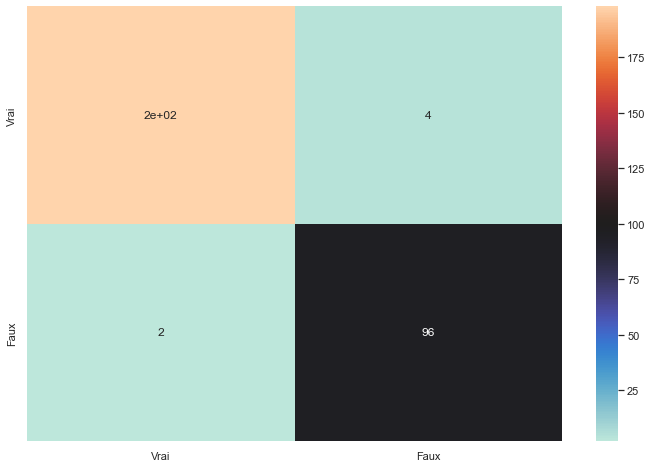

In [67]:
fig = plt.figure(figsize=(12,8))
cf_matrix = confusion_matrix(ytest, predictions)
sns.heatmap(cf_matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"],cmap='icefire')

In [68]:
x = (6 /300)*100
x
# mon modéle ayant 2% d'erreur, il a amélioré la probabilité d'erreur

2.0

# Fonction pour tester les modéles :

In [69]:
# Partie def de la fonction :

def predict_case(Essai:str, Drop_ID:str)->pd.DataFrame: # Lit le CSV et supprime la colonne ID
    Fichier:pd.DataFrame = pd.read_csv(Essai)
    Valeur = Fichier.drop(columns={Drop_ID})
    
# Partie Analyse :    

    Valeur = std_scale.fit_transform(Valeur)
    Valeur = PCA_decomposition.transform(Valeur)
    Valeur = logisticRegr.predict_proba(Valeur) # _proba permet de faire une prediction via la regression logistique en affichant les probas de faux et de vrais.
    
# Partie Création de la matrice : 

    Valeur = pd.DataFrame(Valeur)
    Valeur = round(Valeur,2)*100 
    Valeur = Valeur.astype(str)+'%'
    Valeur = pd.concat([Fichier[Drop_ID],Valeur],axis=1)
    Valeur = Valeur.rename(columns= {0 : 'Vrais Billets', 1 : 'Faux Billets', Drop_ID : 'prediction'})
    return Valeur  

### Insertion du CSV :

In [84]:
predict_case('billets_test_3.csv', 'id')

prediction Vrais Billets        Faux Billets
0        B_1         93.0%  7.000000000000001%
1        B_2         40.0%               60.0%
2        B_3        100.0%                0.0%
3        B_4        100.0%                0.0%
4        B_5          1.0%               99.0%

### Lecture du CSV :

In [85]:
TEST_2 = pd.read_csv('billets_test_3.csv')
TEST_2

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    172.09       103.95        103.73        4.39       3.09  113.19  B_1
1    171.52       104.17        104.03        5.27       3.16  111.82  B_2
2    171.78       103.80        103.75        3.81       3.24  113.39  B_3
3    172.02       104.08        103.99        5.57       3.30  111.10  B_4
4    171.79       104.34        104.37        5.00       3.07  111.87  B_5

### Suppression de la colonne ID :

In [86]:
TEST_2 = TEST_2.drop('id', axis=1)

### transformation des données :

In [87]:
TEST_2 = std_scale.transform(TEST_2)

TEST_2

array([[ 1.23950858, -0.63941849, -1.05016441, -0.66063862, -0.93715816,
         1.04631132],
       [-1.58657098,  0.55271768,  0.24102134,  0.73017953, -0.1371451 ,
        -0.51858662],
       [-0.29748206, -1.4522386 , -0.96408536, -1.57731422,  0.77715555,
         1.27476358],
       [ 0.89244618,  0.06502561,  0.06886324,  1.20432208,  1.46288103,
        -1.34101473],
       [-0.24790172,  1.4739138 ,  1.70436519,  0.30345123, -1.16573332,
        -0.46147355]])

### Création du DF TEST_2_projected :

In [88]:
TEST_2_projected = PCA_decomposition.transform(TEST_2)
TEST_2_projected = pd.DataFrame(TEST_2_projected)
TEST_2_projected

0         1
0  0.003674  0.737125
1  0.543036 -1.269460
2 -1.292522 -0.879338
3 -0.949215  1.031526
4  1.695026  0.380147

### Visu des données :

In [89]:
fig =  px.scatter( x= TEST_2_projected.loc[:,0], y = TEST_2_projected.loc[:,1])
fig.update_layout(width=800, height=800, title = 'Composante 1 et 2',
                  xaxis=dict(title='1ere composante à 49%'),
                  yaxis=dict(title='2eme composante à 15%')
                           )